## 서울 지하철역 

이도미

In [1]:
import numpy as np
import scipy.linalg as la
import scipy.sparse as sp
import scipy.sparse.linalg

import matplotlib.pyplot as plt
import matplotlib as mpl

import networkx as nx
import json

from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
from matplotlib import font_manager, rc

malgun_family = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=malgun_family)

## Graphs and networks

In [3]:
with open("SeoulMetro_2.json", "r", encoding="utf-8") as f:
    data = json.load(f)

In [4]:
g = nx.Graph()

for line in data.values():
    g.add_edges_from(line["transfers"])    
    g.add_weighted_edges_from(line["travel_times"])
    
for n1, n2 in g.edges():
    g[n1][n2]["transfer"] = "weight" not in g[n1][n2]    
    
on_foot = [edge for edge in g.edges() if g.get_edge_data(*edge)["transfer"]]
on_train = [edge for edge in g.edges() if not g.get_edge_data(*edge)["transfer"]]    

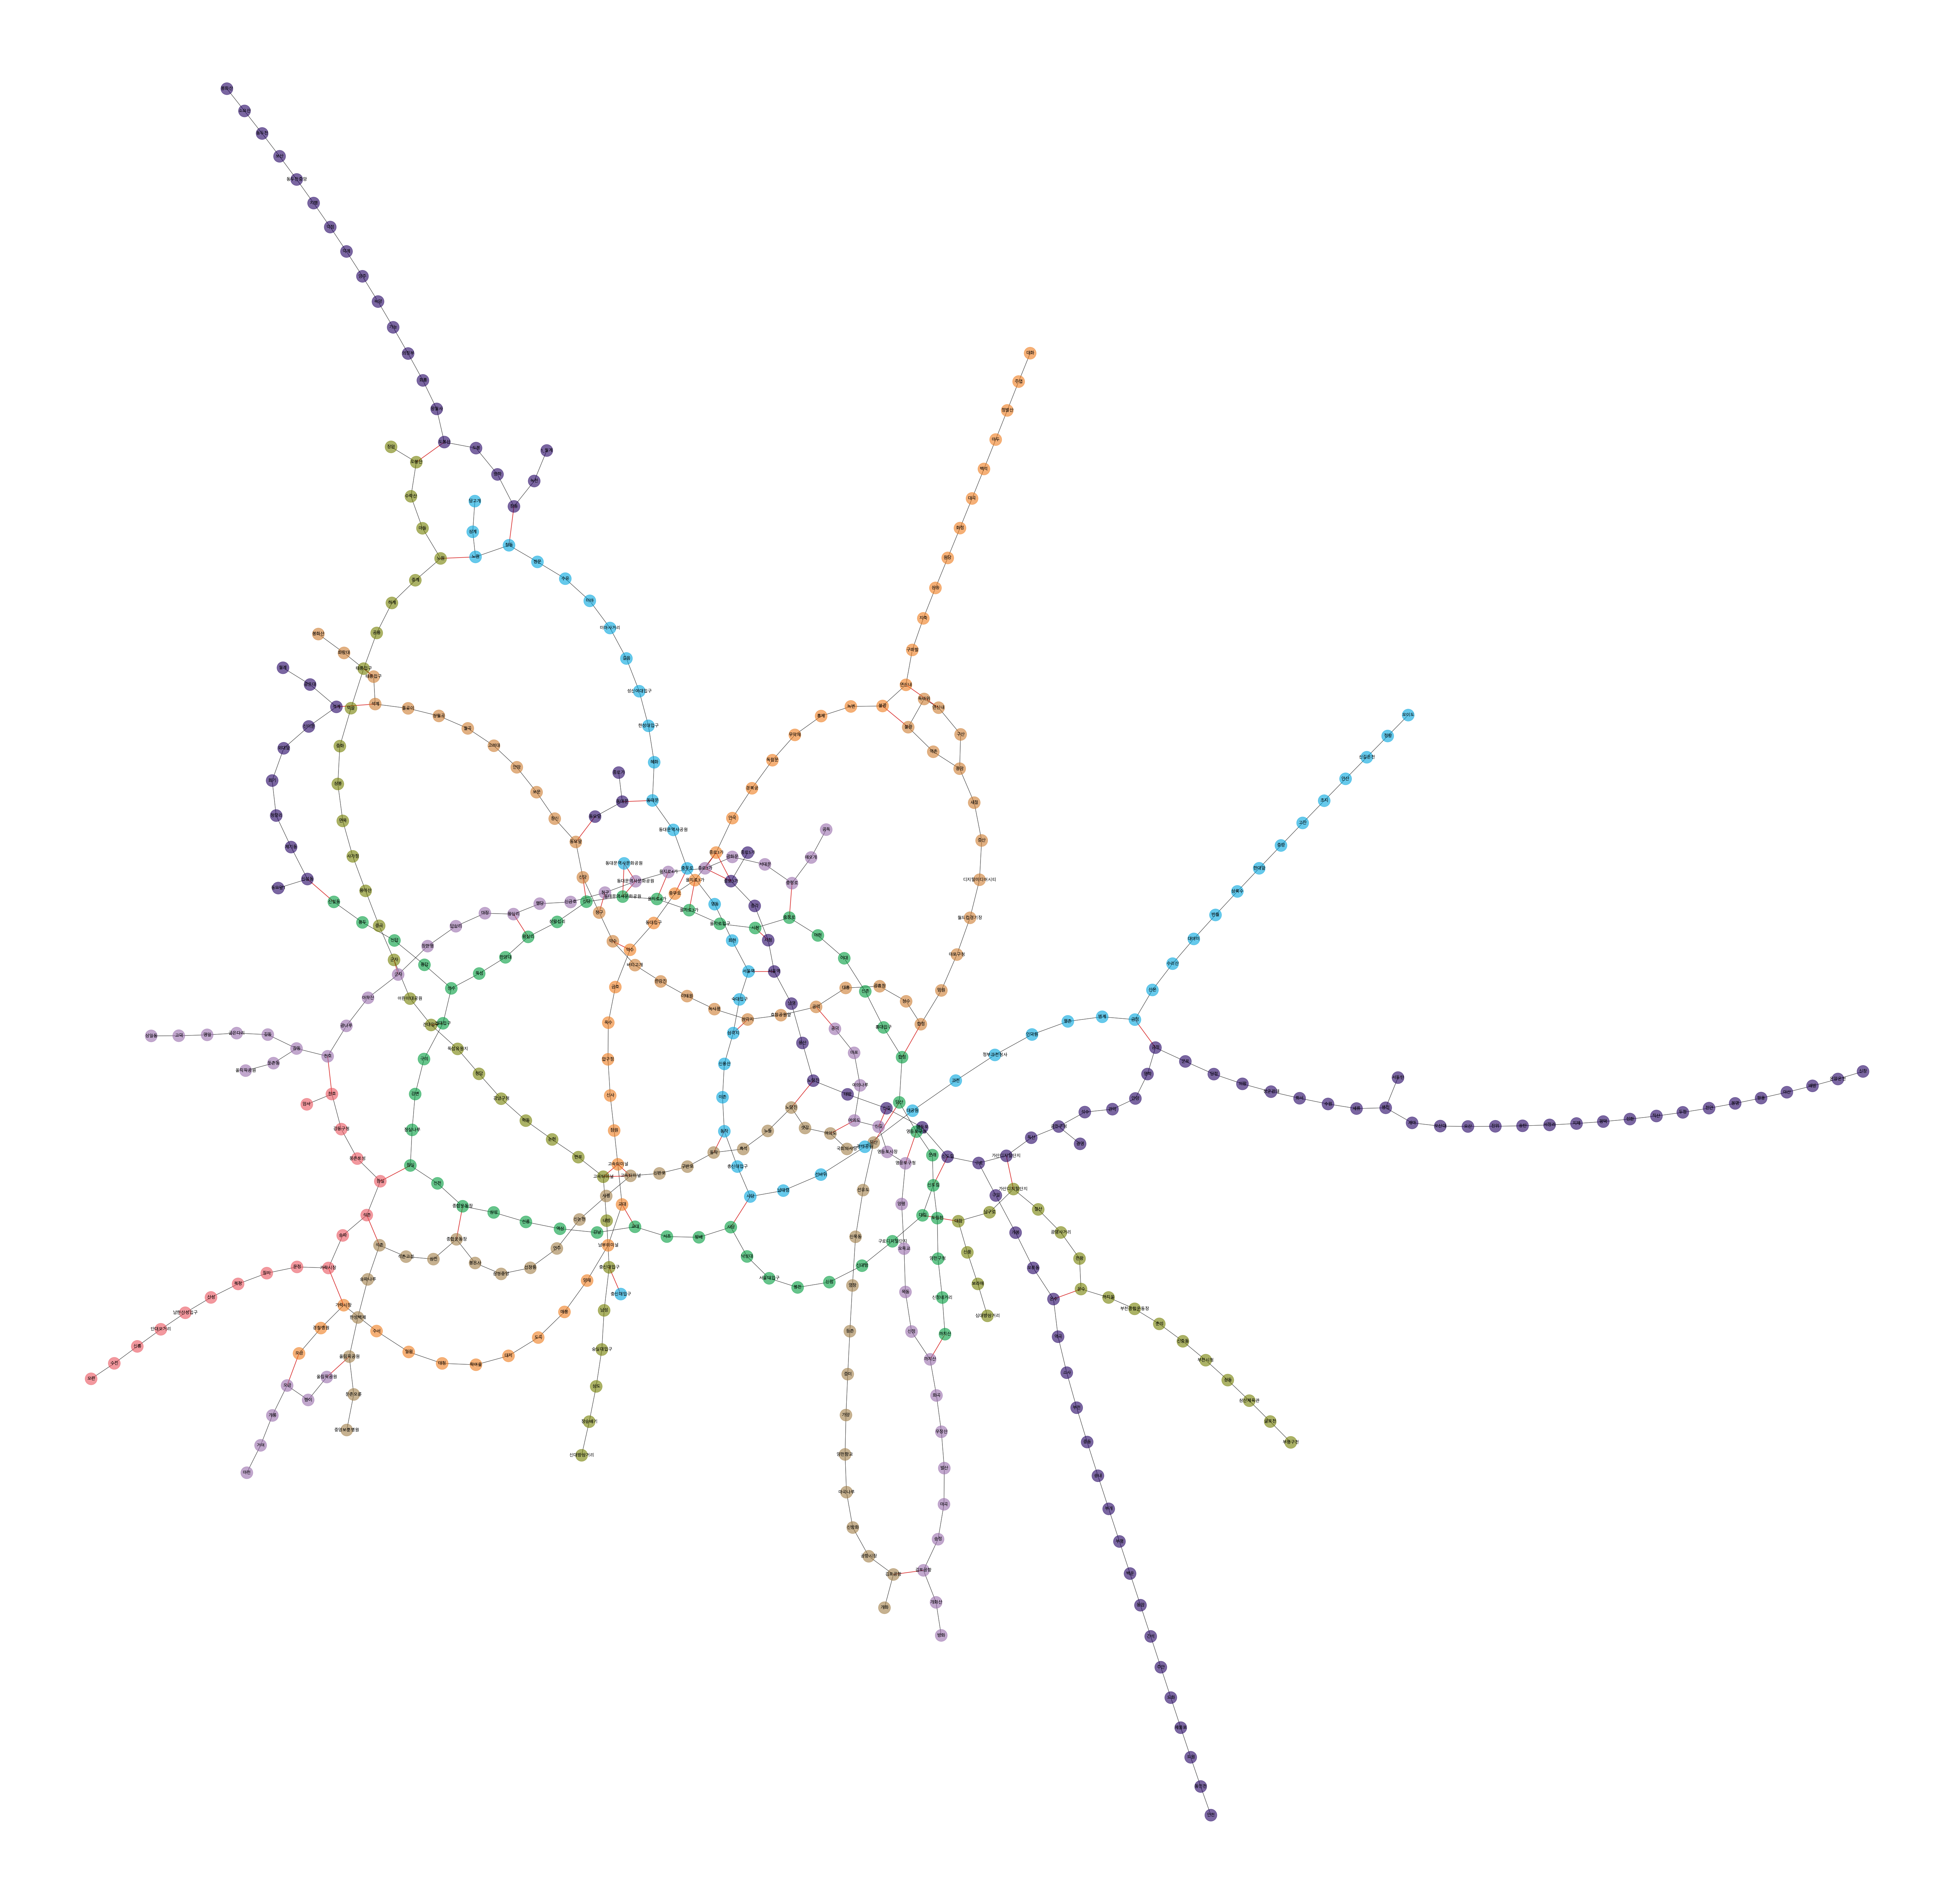

In [5]:
#%matplotlib qt

fig, ax = plt.subplots(1, 1, figsize=(100, 100))

pos = graphviz_layout(g, prog="neato")
line_color = [data[n[:1] +'호선']["color"] for n in g.nodes()]
station = {n: n[2:] for n in g.nodes()}

nx.draw_networkx(g, pos, ax=ax, node_size=1200, node_color=line_color, alpha=0.6, labels=station, font_family=malgun_family, font_size=12, encoding='utf8')

nx.draw_networkx_labels(g, pos=pos, ax=ax, labels=station, font_family=malgun_family,font_size=12, encoding='utf8')
nx.draw_networkx_edges(g, pos=pos, ax=ax, edgelist=on_train, alpha=0.6, width=1) 
nx.draw_networkx_edges(g, pos=pos, ax=ax, edgelist=on_foot, edge_color="red", alpha=0.6, width=2) 

for side in ['bottom','right','top','left']:
    ax.spines[side].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

plt.savefig('SeoulMetro_2.pdf')